In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
from scipy import fftpack
import pandas as pd
from pathlib import Path
import os
import copy
import json
from IPython.display import display
from ipyfilechooser import FileChooser
from ephyviewer import mkQApp, MainViewer, TraceViewer
from ephyviewer import AnalogSignalSourceWithScatter
import ephyviewer
from scipy.stats import zscore
from scipy.interpolate import interp1d
from itertools import groupby
import sys 
import pickle
import seaborn as sns
from scipy.signal import find_peaks
from scipy.signal import chirp, find_peaks, peak_widths
from scipy import stats
import matplotlib.colors as mcolors
import warnings
from scipy import interpolate

warnings.filterwarnings("ignore")

#%matplotlib widget

In [5]:
#with open(f'//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/Analysed2025_AB/_global_analysis/AVG_VigSt_2025-04-17_13_17_51_Correlations/L1NDNF_mice_SubSt_CaCorr.pkl', 'rb') as pickle_file:
with open(f"//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/Analysed2025_AB/_baseline_analysis/VigSt_2025-04-16_18_40_04_CellAssembly/VigSt_CaCorr_GreenDots.pkl", 'rb') as pickle_file:
    combined_df = pickle.load(pickle_file)

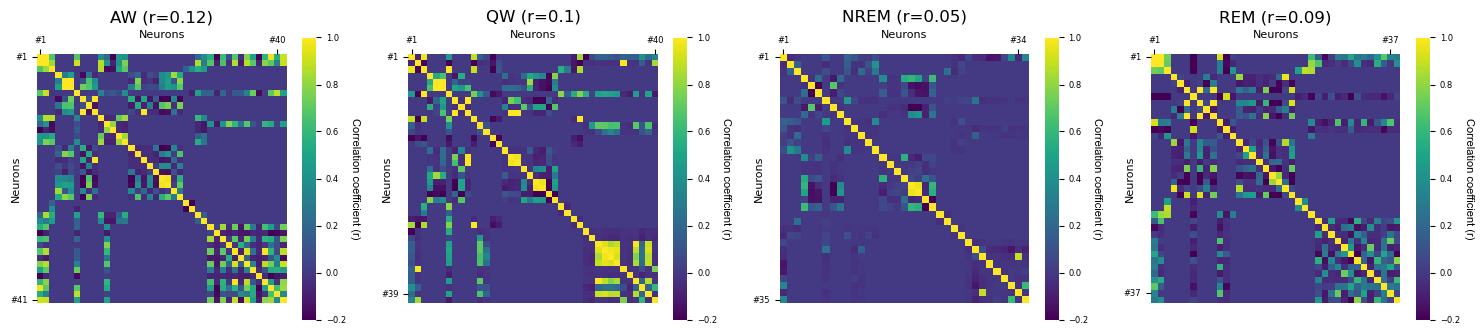

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
VMAX=1
VMIN=-.2

CaCorrMatrix=combined_df['baseline_AW']
df = CaCorrMatrix.apply(pd.to_numeric, errors='coerce')
ax = sns.heatmap(df, ax=axes[0], square=True, vmin=VMIN , vmax=VMAX , cmap='viridis',
                                  cbar_kws={'shrink': 0.6, 'aspect': 20})
# Set only the first and last ticks for x and y axes
# Get the number of ticks
x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()
ax.set_xticks([x_ticks[0], x_ticks[-1]])
ax.set_yticks([y_ticks[0], y_ticks[-1]])

# Optionally, set the labels for these ticks if needed
ax.set_xticklabels([f'#{int(x_ticks[0])+1}', f'#{int(x_ticks[-1])+1}'],size=6)
ax.set_yticklabels([f'#{int(y_ticks[0])+1}', f'#{int(y_ticks[-1])+1}'],size=6)

# Optionally, add labels for the axes if needed
ax.set_xlabel('Neurons', labelpad=-2,size=8) 
ax.set_ylabel('Neurons', labelpad=-8,size=8) 
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Adjust the font size here
cbar.set_label('Correlation coefficient (r)', fontsize=8, font='Arial', rotation=-90, labelpad=10)
ax.xaxis.set_ticks_position('top')  # Move ticks to the top
ax.xaxis.set_label_position('top')  # Move label to the top
axes[0].set_title(f'AW (r={(np.round(np.nanmean(CaCorrMatrix),2))})', fontsize=12)


CaCorrMatrix=combined_df['baseline_QW']
df = CaCorrMatrix.apply(pd.to_numeric, errors='coerce')
ax = sns.heatmap(df, ax=axes[1], square=True, vmin=VMIN , vmax=VMAX , cmap='viridis',
                                  cbar_kws={'shrink': 0.6, 'aspect': 20})
# Set only the first and last ticks for x and y axes
# Get the number of ticks
x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()
ax.set_xticks([x_ticks[0], x_ticks[-1]])
ax.set_yticks([y_ticks[0], y_ticks[-1]])

# Optionally, set the labels for these ticks if needed
ax.set_xticklabels([f'#{int(x_ticks[0])+1}', f'#{int(x_ticks[-1])+1}'],size=6)
ax.set_yticklabels([f'#{int(y_ticks[0])+1}', f'#{int(y_ticks[-1])+1}'],size=6)

# Optionally, add labels for the axes if needed
ax.set_xlabel('Neurons', labelpad=-2,size=8) 
ax.set_ylabel('Neurons', labelpad=-8,size=8) 
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Adjust the font size here
cbar.set_label('Correlation coefficient (r)', fontsize=8, font='Arial', rotation=-90, labelpad=10)
ax.xaxis.set_ticks_position('top')  # Move ticks to the top
ax.xaxis.set_label_position('top')  # Move label to the top
axes[1].set_title(f'QW (r={(np.round(np.nanmean(CaCorrMatrix),2))})', fontsize=12)


CaCorrMatrix=combined_df['baseline_NREM']
df = CaCorrMatrix.apply(pd.to_numeric, errors='coerce')
ax = sns.heatmap(df, ax=axes[2], square=True, vmin=VMIN , vmax=VMAX , cmap='viridis',
                                  cbar_kws={'shrink': 0.6, 'aspect': 20})
# Set only the first and last ticks for x and y axes
# Get the number of ticks
x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()
ax.set_xticks([x_ticks[0], x_ticks[-1]])
ax.set_yticks([y_ticks[0], y_ticks[-1]])

# Optionally, set the labels for these ticks if needed
ax.set_xticklabels([f'#{int(x_ticks[0])+1}', f'#{int(x_ticks[-1])+1}'],size=6)
ax.set_yticklabels([f'#{int(y_ticks[0])+1}', f'#{int(y_ticks[-1])+1}'],size=6)

# Optionally, add labels for the axes if needed
ax.set_xlabel('Neurons', labelpad=-2,size=8) 
ax.set_ylabel('Neurons', labelpad=-8,size=8) 
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Adjust the font size here
cbar.set_label('Correlation coefficient (r)', fontsize=8, font='Arial', rotation=-90, labelpad=10)
ax.xaxis.set_ticks_position('top')  # Move ticks to the top
ax.xaxis.set_label_position('top')  # Move label to the top
axes[2].set_title(f'NREM (r={(np.round(np.nanmean(CaCorrMatrix),2))})', fontsize=12)



CaCorrMatrix=combined_df['baseline_REM']
df = CaCorrMatrix.apply(pd.to_numeric, errors='coerce')
ax = sns.heatmap(df, ax=axes[3], square=True, vmin=VMIN , vmax=VMAX , cmap='viridis',
                                  cbar_kws={'shrink': 0.6, 'aspect': 20})
# Set only the first and last ticks for x and y axes
# Get the number of ticks
x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()
ax.set_xticks([x_ticks[0], x_ticks[-1]])
ax.set_yticks([y_ticks[0], y_ticks[-1]])

# Optionally, set the labels for these ticks if needed
ax.set_xticklabels([f'#{int(x_ticks[0])+1}', f'#{int(x_ticks[-1])+1}'],size=6)
ax.set_yticklabels([f'#{int(y_ticks[0])+1}', f'#{int(y_ticks[-1])+1}'],size=6)

# Optionally, add labels for the axes if needed
ax.set_xlabel('Neurons', labelpad=-2,size=8) 
ax.set_ylabel('Neurons', labelpad=-8,size=8) 
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Adjust the font size here
cbar.set_label('Correlation coefficient (r)', fontsize=8, font='Arial', rotation=-90, labelpad=10)
ax.xaxis.set_ticks_position('top')  # Move ticks to the top
ax.xaxis.set_label_position('top')  # Move label to the top
axes[3].set_title(f'REM (r={np.round(np.nanmean(CaCorrMatrix),2)})', fontsize=12)


#plt.savefig(f'C:/Users/Manip2/Documents/ElifePaper/Rawdata/Extract{mice}_{folder_base.parts[-2]}_3VigSt_{beg}to{fin}s_2heatmap.svg', format='svg', bbox_inches='tight', pad_inches=0, transparent=True)
plt.tight_layout()
plt.show()